#**Emotion Detection using Tensorflow 2.x**

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##**Problem Statement**

Human emotion recognition plays a vital role in the interpersonal relationship. The automatic identification of emotions has been an active research topic since the early eras. Emotions are reflected from speech, hand, and gestures of the body and through facial expressions. As a human, I am sure; for most of you, it must be an easy task to judge a person by his emotion and communicate with them. But what if you want the machine to talk similarly by analyzing the feeling. Just as a human extracting and understanding the emotions, it is equally essential for the machine to understand the sentiment and then interact/respond to the human. So as part of this project, let us try to resolve one of the issues and predict the emotion of a person using his facial features in real-time.


##**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Recognize each face based on the emotion shown in the facial expression into one of seven categories (0=**Angry**, 1=**Disgust**, 2=**Fear**, 3=**Happy**, 4=**Sad**, 5=**Surprise**, 6=**Neutral**)
  - Import Required Libraries
  - Prepare the dataset for the model
  - Develop CNN model for recognizing facial expression of the images
  - Analyse the model summary
  - Fit the basic CNN model
  - Save the model & load the saved weight to test the model
  - Predict the facial expression of the uploaded image
- Use OpenCV and Haar Cascade File to check the emotion in real time



##**Dataset Description**



fer2013 is an open-source dataset, first created for an ongoing project by Pierre-Luc Carrier and Aaron Courville, then shared publicly for a Kaggle competition, shortly before ICML 2013. 
This dataset consists of 35,887 grayscale, 48x48 sized face images with 7 different emotions, all labelled.

**Fer.csv** contains two columns, **emotion** and **pixels**. 

The **emotion** column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 

The **pixels** column contains a string surrounded in quotes for each image 

**Classes:** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

![alt text](https://i.imgur.com/4UGNOie.png)


####**Skills Gained**

 TensorFlow 2.x 
- Convolutional Neural Network (CNN) implementation
- Load the pretrained model
- OpenCV


# **Solution:** Facial Expression Recognition using CNN on Tensorflow 2.x

##**Importing Required Libraries**

In [0]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Tensorflow Version:',tensorflow.__version__)

Tensorflow Version: 2.2.0


## <b> Load the  Dataset

In [0]:
# Loading the Dataset

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df = pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head()

## **Prepare the dataset for the model**

In [0]:
# Images are of 48x48 pixels
# No. of Images = 35887

def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [0]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

In [0]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset

In [0]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

###**Develop CNN model for recognizing facial expression of the images**

In [0]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))#64 neurons with 5*5 filter
    #This class allows to create convolutional neural network to extract feature from the images
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Flatten())#Converts multi dimensional array to 1D channel
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu')) #relu activation function added to remove the negative values
    model.add(Dropout(0.2)) #Used to prevent a model from overfitting
    model.add(Dense(7)) #output layer
    model.add(Activation('softmax')) #softmax activation function
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
model.summary()

###**Fit the basic CNN Model**

In [0]:
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True])

In [0]:
#Categories of Facial Expressions

objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [0]:
#A Fucntion for visualizing the Facial Expression Recognition Results

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.title('Emotion')
    
plt.show()

**Deep Learning** models can take hours, days and even weeks to train

That's why, we are going to use a pre-trained model



In [0]:
#Uploding the model file onto the Google Co-Lab Platform
from google.colab import files
files.upload()

Saving model_filter.h5 to model_filter.h5


##**Using the model_filter.h5 file to predict Facial Expressions**

In [0]:
from numpy import loadtxt
from keras.models import load_model
 
# Loading the Model
model = load_model('model_filter.h5')#Loding the pre-trained model file

# Model Summary
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

###**Uploading Images onto Google Colab Platform for Facial Expression Recognition**

In [0]:
from google.colab import files
files.upload()

Saving angry.jpg to angry.jpg


{'angry.jpg': b'\xff\xd8\xff\xed\x00PPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x18\x1c\x02n\x00\x13\xa9 PICTURE PUBLICITY8BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00\xd1\x00\x00\x00\x01\x00\x01\x00\xd1\x00\x00\x00\x01\x00\x01\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xd1\x00\xd1\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x03\x03\x02\x04\x03\x03\x03\x04\x04\x04\x05\x06\n\x06\x06\x05\x05\x06\x0c\x08\t\x07\n\x0e\x0c\x0f\x0e\x0e\x0c\r\r\x0f\x11\x16\x13\x0f\x10\x15\x11\r\r\x13\x1a\x13\x15\x17\x18\x19\x19\x19\x0f\x12\x1b\x1d\x1b\x18\x1d\x16\x18\x19\x18\xff\xdb\x00C\x01\x04\x04\x04\x06\x05\x06\x0b\x06\x06\x0b\x18\x10\r\x10\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\xff\xc0\x00\x11\x08\x02\x19\x02z\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x0

In [0]:
from google.colab import files
files.upload()

Saving happy.jpg to happy.jpg


{'happy.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 90\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xa1\x02r\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x

In [0]:
from google.colab import files
files.upload()

Saving neutral.jpg to neutral.jpg


{'neutral.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xed\x1eFPhotoshop 3.0\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00\xf0\x00\x00\x00\x01\x00\x01\x00\xf0\x00\x00\x00\x01\x00\x018BIM\x04\x04\x00\x00\x00\x00\x00\x1f\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x04\x1c\x02P\x00\x0bScott Eaton\x008BIM\x04\x0c\x00\x00\x00\x00\x1d\xc5\x00\x00\x00\x01\x00\x00\x00\xcd\x00\x00\x01\x00\x00\x00\x02h\x00\x02h\x00\x00\x00\x1d\xa9\x00\x18\x00\x01\xff\xd8\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0

###**Predict the Facial Expression of an Image**

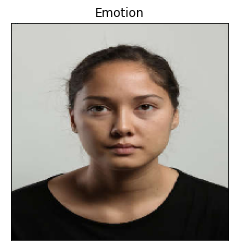

Expression Prediction: Neutral


In [0]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

img = image.load_img('neutral.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('neutral.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
 #print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])

plt.show()

objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

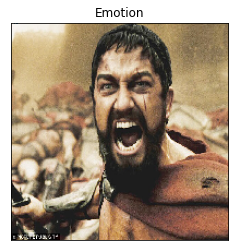

Expression Prediction: Surprise


In [0]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

img = image.load_img('angry.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('angry.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
 #print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])

plt.show()

objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

##**Use OpenCV and Haar Cascade File to check the emotion in real time**


In [0]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)


In [0]:
#Save this code as file_name.py
#Save the fer.json file, model_filter.h5 file, and this code in the same folder
#Run it in your local system to recognize facial expression in real-time. 
#You can use Pycharm or Anaconda CLI to execute this section

import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('model_filter.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
- Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the purpose of MaxPooling2D layer?
- Does manipulating the learning rate affect the model? Justify your answer.


###**`.ipynb file 2`** 


**Marks: 15**
- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


###**`.ipynb file 3`** 


**Marks: 25**

**Problem Statement**<br>

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old)

The objective is to -
- **PS 1** - Classify each face based on Gender using Convolutoional Neural Networks on Tensorflow 2.x

- **PS 2** - Use OpenCV & Haar Cascade File to check the gender in real time


**Dataset Description**
- **Total Images**: The dataset consists of over 20,000 Face Images 

- The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, gender detection, age progression/regression, landmark localization, etc.

- You will be using **Aligned & Cropped Faces** Dataset from the UTKFace Dataset
 

**Tasks to be performed**

- Import Required Libraries
- Prepare the dataset for the model
- Develop CNN model for recognizing the gender
- Analyse the model summary
- Fit the basic CNN model
- Save the model & load the saved weight to test the model
- Predict the gender of the uploaded image
- Use OpenCV and Haar Cascade File to check the gender in real time

